<a href="https://colab.research.google.com/github/usernameatku/882Project/blob/main/Elasticity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Performs the Finite Element Method

In [1]:
import numpy as np
import math

#--------Five point Guassian quadrature  ------------

inx = [1/3, (6+math.sqrt(15))/21, (9-2*math.sqrt(15))/21, (6+math.sqrt(15))/21, (6-math.sqrt(15))/21, (9+2*math.sqrt(15))/21, (6-math.sqrt(15))/21]

iny = [1/3, (6+math.sqrt(15))/21, (6+math.sqrt(15))/21, (9-2*math.sqrt(15))/21, (6-math.sqrt(15))/21, (6-math.sqrt(15))/21, (9+2*math.sqrt(15))/21]

inw = [9/80, (155+math.sqrt(15))/2400, (155+math.sqrt(15))/2400, (155+math.sqrt(15))/2400, (155-math.sqrt(15))/2400, (155-math.sqrt(15))/2400, (155-math.sqrt(15))/2400]

intx = np.array(inx)

inty = np.array(iny)

intw = np.array(inw)

#======================================================

def femelasticity(nvm, lamb, mu):

  max_it = 1000
  tol = 10^(-6)

  # computational domain

  rmb=0
  rme=1
  rnb=0
  rne=1

  # total number of nodes

  nvn = nvm
  nvm1 = nvm+1
  nvn1 = nvn+1
  nv = nvm1*nvn1

  # total number of elements

  ne = nvm*nvn*2

  # functions for right hand side

  def f1(x,y):
    result = 2*mu*math.sin(x)*math.sin(y)
    # result = (lamb+mu)*math.pi**2*math.sin(math.pi*x)
    return result

  def f2(x,y):
    result = 2*mu*math.cos(x)*math.cos(y)
    # result = (lamb+mu)*math.pi**2*math.sin(math.pi*y)
    return result

  def futrue(x,y):
    result = [math.sin(x)*math.sin(y)+x/lamb, math.cos(x)*math.cos(y)+y/lamb]
    # result = [math.sin(math.pi*x), math.sin(math.pi*y)]
    return np.array(result)

  # get the mesh in each subdomain

  lijtk = np.reshape(np.linspace(0,nv-1,num=nv),(nvm1,nvn1))

  #  to get the local connectivity matrix

  nconn = np.zeros([3,ne])

  ii=1

  for i in range(nvm):
      ip=i+1
      for  j in range(nvn):
        jp=j+1
        nconn[0,ii-1] = lijtk[i,j]
        nconn[1,ii-1] = lijtk[ip,j]
        nconn[2,ii-1] = lijtk[ip,jp]
        nconn[0,ii] = lijtk[i,j]
        nconn[1,ii] = lijtk[i,jp]
        nconn[2,ii] = lijtk[ip,jp]
        ii=ii+2

  # initialize the stiffness matrix and load vector

  aK = np.empty([2*nv,2*nv])
  b=np.zeros([2*nv,1])

  # to obtain the coordinates

  x = np.zeros([2,nv])

  jake = np.linspace(rnb, rne, num=nvn1)
  trystan = np.linspace(rmb, rme, num=nvm1)

  for i in range(1,nvn1):
    aaron = lijtk[i,...]
    for j in range(nvn1):
      x[0,int(aaron[j])] = trystan[i]

  for i in range(1,nvm1):
    aaron = lijtk[:,i]
    for j in range(nvm1):
      x[1,int(aaron[j])] = jake[i]

  # calculate over the elements

  mydet = np.zeros([1,ne])

  for k in range(1,ne+1):
    n1 =nconn[0,k-1]
    n2 =nconn[1,k-1]
    n3 =nconn[2,k-1]
    n1v =n1+nv
    n2v =n2+nv
    n3v =n3+nv

    x1=x[0,int(n1)]
    y1=x[1,int(n1)]
    x2=x[0,int(n2)]
    y2=x[1,int(n2)]
    x3=x[0,int(n3)]
    y3=x[1,int(n3)]

    b11=x2-x1
    b12=x3-x1
    b21=y2-y1
    b22=y3-y1

    detb=b11*b22-b12*b21
    adetb=abs(detb)
    mydet[0,k-1]=adetb
    d11=b22/detb
    d12=-b21/detb
    d21=-b12/detb
    d22=b11/detb
    w1x=-(d11+d12)
    w1y=-(d21+d22)
    w2x=d11
    w2y=d21
    w3x=d12
    w3y=d22

    n1=int(n1)
    n2=int(n2)
    n3=int(n3)
    n1v=int(n1v)
    n2v=int(n2v)
    n3v=int(n3v)

  #row 1
    aK[n1,n1]=aK[n1,n1]+adetb/2 * (lamb * w1x*w1x + 2*mu * (w1x*w1x + w1y/2*w1y/2*2))
    aK[n1,n2]=aK[n1,n2]+adetb/2 * (lamb * w1x*w2x + 2*mu * (w1x*w2x + w1y/2*w2y/2*2))
    aK[n1,n3]=aK[n1,n3]+adetb/2 * (lamb * w1x*w3x + 2*mu * (w1x*w3x + w1y/2*w3y/2*2))
    aK[n1,n1v]=aK[n1,n1v]+adetb/2 * (lamb * w1x*w1y + 2*mu * (w1y/2*w1x/2*2))
    aK[n1,n2v]=aK[n1,n2v]+adetb/2 * (lamb * w1x*w2y + 2*mu * (w1y/2*w2x/2*2))
    aK[n1,n3v]=aK[n1,n3v]+adetb/2 * (lamb * w1x*w3y + 2*mu * (w1y/2*w3x/2*2))

  #row 2
    aK[n2,n1]=aK[n2,n1]+adetb/2 * (lamb * w2x*w1x + 2*mu * (w2x*w1x + w2y/2*w1y/2*2))
    aK[n2,n2]=aK[n2,n2]+adetb/2 * (lamb * w2x*w2x + 2*mu * (w2x*w2x + w2y/2*w2y/2*2))
    aK[n2,n3]=aK[n2,n3]+adetb/2 * (lamb * w2x*w3x + 2*mu * (w2x*w3x + w2y/2*w3y/2*2))
    aK[n2,n1v]=aK[n2,n1v]+adetb/2 * (lamb * w2x*w1y + 2*mu * (w2y/2*w1x/2*2))
    aK[n2,n2v]=aK[n2,n2v]+adetb/2 * (lamb * w2x*w2y + 2*mu * (w2y/2*w2x/2*2))
    aK[n2,n3v]=aK[n2,n3v]+adetb/2 * (lamb * w2x*w3y + 2*mu * (w2y/2*w3x/2*2))

  #row 3
    aK[n3,n1]=aK[n3,n1]+adetb/2 * (lamb * w3x*w1x + 2*mu * (w3x*w1x + w3y/2*w1y/2*2))
    aK[n3,n2]=aK[n3,n2]+adetb/2 * (lamb * w3x*w2x + 2*mu * (w3x*w2x + w3y/2*w2y/2*2))
    aK[n3,n3]=aK[n3,n3]+adetb/2 * (lamb * w3x*w3x + 2*mu * (w3x*w3x + w3y/2*w3y/2*2))
    aK[n3,n1v]=aK[n3,n1v]+adetb/2 * (lamb * w3x*w1y + 2*mu * (w3y/2*w1x/2*2))
    aK[n3,n2v]=aK[n3,n2v]+adetb/2 * (lamb * w3x*w2y + 2*mu * (w3y/2*w2x/2*2))
    aK[n3,n3v]=aK[n3,n3v]+adetb/2 * (lamb * w3x*w3y + 2*mu * (w3y/2*w3x/2*2))

  #row 4
    aK[n1v,n1]=aK[n1v,n1]+adetb/2 * (lamb * w1y*w1x + 2*mu * (w1x/2*w1y/2*2))
    aK[n1v,n2]=aK[n1v,n2]+adetb/2 * (lamb * w1y*w2x + 2*mu * (w1x/2*w2y/2*2))
    aK[n1v,n3]=aK[n1v,n3]+adetb/2 * (lamb * w1y*w3x + 2*mu * (w1x/2*w3y/2*2))
    aK[n1v,n1v]=aK[n1v,n1v]+adetb/2 * (lamb * w1y*w1y + 2*mu * (w1x/2*w1x/2*2 + w1y*w1y))
    aK[n1v,n2v]=aK[n1v,n2v]+adetb/2 * (lamb * w1y*w2y + 2*mu * (w1x/2*w2x/2*2 + w1y*w2y))
    aK[n1v,n3v]=aK[n1v,n3v]+adetb/2 * (lamb * w1y*w3y + 2*mu * (w1x/2*w3x/2*2 + w1y*w3y))

  #row 5
    aK[n2v,n1]=aK[n2v,n1]+adetb/2 * (lamb * w2y*w1x + 2*mu * (w2x/2*w1y/2*2))
    aK[n2v,n2]=aK[n2v,n2]+adetb/2 * (lamb * w2y*w2x + 2*mu * (w2x/2*w2y/2*2))
    aK[n2v,n3]=aK[n2v,n3]+adetb/2 * (lamb * w2y*w3x + 2*mu * (w2x/2*w3y/2*2))
    aK[n2v,n1v]=aK[n2v,n1v]+adetb/2 * (lamb * w2y*w1y + 2*mu * (w2x/2*w1x/2*2 + w2y*w1y))
    aK[n2v,n2v]=aK[n2v,n2v]+adetb/2 * (lamb * w2y*w2y + 2*mu * (w2x/2*w2x/2*2 + w2y*w2y))
    aK[n2v,n3v]=aK[n2v,n3v]+adetb/2 * (lamb * w2y*w3y + 2*mu * (w2x/2*w3x/2*2 + w2y*w3y))

  #row 6
    aK[n3v,n1]=aK[n3v,n1]+adetb/2 * (lamb * w3y*w1x + 2*mu * (w3x/2*w1y/2*2))
    aK[n3v,n2]=aK[n3v,n2]+adetb/2 * (lamb * w3y*w2x + 2*mu * (w3x/2*w2y/2*2))
    aK[n3v,n3]=aK[n3v,n3]+adetb/2 * (lamb * w3y*w3x + 2*mu * (w3x/2*w3y/2*2))
    aK[n3v,n1v]=aK[n3v,n1v]+adetb/2 * (lamb * w3y*w1y + 2*mu * (w3x/2*w1x/2*2 + w3y*w1y))
    aK[n3v,n2v]=aK[n3v,n2v]+adetb/2 * (lamb * w3y*w2y + 2*mu * (w3x/2*w2x/2*2 + w3y*w2y))
    aK[n3v,n3v]=aK[n3v,n3v]+adetb/2 * (lamb * w3y*w3y + 2*mu * (w3x/2*w3x/2*2 + w3y*w3y))


    ointx=x1+b11*intx+b12*inty
    ointy=y1+b21*intx+b22*inty
    int1=0
    int2=0
    int3=0
    int1v=0
    int2v=0
    int3v=0

    for i in range(1,8):
      xxx=ointx[i-1]
      yyy=ointy[i-1]

      ff1=f1(xxx,yyy)

      int1=int1+ff1*(1-intx[i-1]-inty[i-1])*intw[i-1]
      int2=int2+ff1*(  intx[i-1]        )*intw[i-1]
      int3=int3+ff1*(          inty[i-1])*intw[i-1]

      ff2=f2(xxx,yyy)

      int1v=int1v+ff2*(1-intx[i-1]-inty[i-1])*intw[i-1]
      int2v=int2v+ff2*(  intx[i-1]        )*intw[i-1]
      int3v=int3v+ff2*(          inty[i-1])*intw[i-1]

    b[n1]=b[n1]+adetb*int1
    b[n2]=b[n2]+adetb*int2
    b[n3]=b[n3]+adetb*int3
    b[n1v]=b[n1v]+adetb*int1v
    b[n2v]=b[n2v]+adetb*int2v
    b[n3v]=b[n3v]+adetb*int3v


  # To obtain true solution

  utrue1=np.zeros([nv,1]);
  utrue2=np.zeros([nv,1]);

  for iit in range(1,nv+1):
    xxx=x[0,iit-1];
    yyy=x[1,iit-1];

    futruexy=futrue(xxx,yyy);

    utrue1[iit-1]=futruexy[0];
    utrue2[iit-1]=futruexy[1];

  utrue = np.concatenate([utrue1,utrue2])

  # Boundary treatment

  ub = np.zeros([nv,1])
  vb = np.zeros([nv,1])

  id = np.array([])
  id = np.union1d(id,lijtk[0,:])
  id = np.union1d(id,lijtk[nvm,:])
  id = np.union1d(id,lijtk[:,0])
  id = np.union1d(id,lijtk[:,nvn])
  id = id.astype(int)
  id = id.transpose()

  ub[id] = utrue1[id]
  vb[id] = utrue2[id]
  uvb = np.concatenate((ub[id],vb[id]))
  ubvb = np.concatenate([ub,vb])

  trent = np.matmul(aK,ubvb)

  b = b - trent

  id = np.union1d(id,id+nv)

  aK[id,:] = 0;
  aK[:,id] = 0;

  iidd = id.shape[0]

  for ddd in range(1,iidd+1):
    iidd = id[ddd-1]
    aK[iidd,iidd]=1

  b[id]=0

  # Solve the system

  u0 = np.linalg.solve(aK,b)

  u = u0[0:nv]+ub
  v = u0[nv:2*nv]+vb

  # Compute the error

  resl2u = np.linalg.norm(utrue1-u)/nvm
  errmaxu = np.max(abs(utrue1-u))

  resl2v = np.linalg.norm(utrue2-v)/nvm
  errmaxv = np.max(abs(utrue2-v))

  print('L2u=',resl2u)
  print('maxu=', errmaxu)

  print('L2v=',resl2v)
  print('maxv=', errmaxv)

  return aK,b,utrue,u0

In [2]:
import torch
import numpy as np
device = "cuda" if torch.cuda.is_available() else "cpu"

def get_der(u, t, order=2):
    '''
    calculating derivation using AD
    '''
    ones = torch.ones_like(u)
    der, = torch.autograd.grad(u, t, create_graph=True, grad_outputs=ones, allow_unused=True)
    if der is None:
        print("Returning zero gradients")
        return torch.zeros_like(t, requires_grad=True)
    else:
        der.requires_grad_()
    for i in range(1, order):
        ones = torch.ones_like(der)
        der, = torch.autograd.grad(der, t, create_graph=True, grad_outputs=ones, allow_unused=True)
        if der is None:
            return torch.zeros_like(t, requires_grad=True)
        else:
            der.requires_grad_()

    return der

def loss_f(u, t, f, order=2):
    '''
    u, t, f are in (number_of_samples,1) shape
    '''
    der = get_der(u, t, order=2)

    f = f.repeat(t.shape[0],1)
    return torch.abs(torch.mean(der + f))


def loss_mse(left, lv, right, rv, model):
    return torch.sqrt((torch.tensor([lv]).to(device)-model(torch.tensor([left]).double().to(device)))**2 + (torch.tensor([rv]).to(device)-model(torch.tensor([right]).double().to(device)))**2)

def loss_fem(A, F, u):

    # print(A.shape, F.shape)
    l =  torch.sqrt(torch.mean((torch.matmul(torch.tensor(A).to(device), u)-torch.tensor(F).to(device))**2))
    return l

In [3]:
import torch
import matplotlib.pyplot as plt

'''
This file contain different training methods for neural network. eg: train pinn alone, train pinn and fem together etc.
'''
device = "cuda" if torch.cuda.is_available() else "cpu"

class train_model_base():
    def __init__(self, model):
        self.model =  model.to(device)
        self.train_data = None

    def _calculate_loss(self, u):
        pass

    def train(self, data, epochs=1000, opt=None):
        self.train_data = data.to(device)
        self.model.train()
        if opt is None:
            opt = torch.optim.Adam(self.model.parameters(), lr = 0.0003)
        self.loss_h = []
        for epoch in range(epochs+1):
            u = self.model(self.train_data)
            loss_epoch = self._calculate_loss(u)
            opt.zero_grad()
            loss_epoch.backward()
            opt.step()
            if epoch%1000==0:
                print(epoch, loss_epoch.detach().cpu().numpy())
            self.loss_h.append(loss_epoch.detach().cpu().numpy())
        return self.loss_h

    def predict(self, p_in_data):
        self.model.eval()
        return self.model(p_in_data)

    def plot_training(self):
        plt.plot(self.loss_h)

class train_pinn_1d(train_model_base):
    def __init__(self, model, f, l_bc, r_bc):
        train_model_base.__init__(self, model)
        self.force    = f
        self.left_bc  = l_bc
        self.right_bc = r_bc
    def _calculate_loss(self, u):
        l = loss_f(u, self.train_data, self.force) + loss_mse(-1.0, self.left_bc, 1.0, self.right_bc, self.model)
        return l

class train_fem_loss_1d(train_model_base):
    def __init__(self, model, A, F):
        train_model_base.__init__(self, model)
        self.A =  A
        self.F =  F
    def _calculate_loss(self, u):
        l = loss_fem(self.A, self.F, u)
        return l

In [4]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"

class FullyConnected(torch.nn.Module):
    def __init__(self, n_hidden, n_layer):
        super(FullyConnected, self).__init__()
        self.hidden1 = torch.nn.Linear(1, n_hidden).double().to(device)
        torch.nn.init.xavier_uniform_(self.hidden1.weight, gain=1).to(device)
        torch.nn.init.ones_(self.hidden1.bias).to(device)

        self.hidden2 = torch.nn.Linear(n_hidden, n_hidden).double().to(device)    # hidden layer
        torch.nn.init.xavier_uniform_(self.hidden2.weight, gain=1).to(device)
        torch.nn.init.ones_(self.hidden2.bias).to(device)

        self.predict = torch.nn.Linear(n_hidden, 1).double().to(device)   # output layer
        torch.nn.init.xavier_uniform_(self.predict.weight, gain=1).to(device)
        torch.nn.init.ones_(self.predict.bias).to(device)

        self.bn1 = torch.nn.BatchNorm1d(num_features=n_hidden).double().to(device)

        self.num_layers = n_layer
        self.relu = torch.nn.ReLU()
        self.tanh = torch.nn.Tanh()

        self.dropout = torch.nn.Dropout(p=0.2)

    def forward(self, x, train=False):

        x = self.hidden1(x)
        # x = self.bn1(x)
        x = self.tanh(x)
        # x = self.dropout(x)

        # for creating number of layers dynamically
        for i in range(self.num_layers):
            x = self.hidden2(x)
            # x = self.bn1(x)
            x = self.tanh(x)
            # x = self.dropout(x)
        x = self.predict(x)
        return x


In [5]:
import pylab as py
import os
from os.path import join as os_join
import json
import math
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
import matplotlib.ticker as ticker
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

# ===============================================================================
# custom plot definitions
# return cm from inch
def cm2inch(value):
    return value / 2.54

# paper size for a4 landscape
height_9 = cm2inch(4.5)
width_14 = cm2inch(7)

# options
# for customizing check https://matplotlib.org/users/customizing.html
params = {  'text.usetex': False,
            'font.size': 6,
            'font.family': 'DejaVu Sans',
            # 'text.latex.unicode': True,
            'figure.titlesize': 8,
            'figure.figsize': (width_14, height_9),
            'figure.dpi': 900,
            # 'figure.constrained_layout.use': True,
            # USE with the suplot_tool() to check which settings work the best
            'figure.subplot.left': 0.15,
            'figure.subplot.bottom': 0.15,
            'figure.subplot.right': 0.95,
            'figure.subplot.top': 0.9,
            'figure.subplot.wspace': 0.225,
            'figure.subplot.hspace': 0.35,
            #
            'axes.titlesize': 8,
            'axes.titlepad': 6,
            'axes.labelsize': 6,
            'axes.labelpad': 4,
            'axes.grid': 'True',
            'axes.grid.which': 'both',
            'axes.xmargin': 0.1,
            'axes.ymargin': 0.1,
            'lines.linewidth': 0.5,
            'lines.markersize': 5,
            'xtick.labelsize': 6,
            'ytick.labelsize': 6,
            'ytick.minor.visible': False,
            'xtick.minor.visible': False,
            'grid.linestyle': '-',
            'grid.linewidth': 0.25,
            'grid.alpha': 0.5,
            'legend.fontsize': 6,
            'savefig.dpi': 900,
            'savefig.format': 'pdf',
            'savefig.bbox': 'tight'
        }

# custom set up for the lines in plots
LINE_TYPE_SETUP = {"color":          ["blue", "darkgreen", "red", "green", "slategrey", "darkmagenta","olive"],
                "linestyle":      ["solid",    "dashed",  "dashdot",    "dotted",   "(offset,on-off-dash-seq)",   ":"],
                "marker":         ["o",    "s",  "^",    "p",   "x", "*", "+"],
                "markeredgecolor": ["blue", "darkgreen", "red", "green", "slategrey", "darkmagenta","olive"],
                "markerfacecolor": ["blue", "darkgreen", "red", "green", "slategrey", "darkmagenta","olive"],
                "markersize":     [0.015,      1,    2,      3,    4,    4]}

def get_rms( series):
    mean = np.mean(series)
    fl_series = series-mean
    return np.sqrt(np.mean(fl_series**2))

class plot_data:
    '''
    This class is for making comparison plot of three variables. The variable on x-axis is given as np_array[0] and variables to compare are provided as
    np_array[1] and np_array[2]. Labels for both the axes and the legend for the variable to compare are given as labels.
    '''
    def __init__(self, np_array1 = None, np_array2 = None, np_array3 = None, savefile_name  = None , labels = None  ):

        # custom rectangle size for figure layout
        cust_rect = [0.05, 0.05, 0.95, 0.95]

        # direct input
        # plt.rcParams['text.latex.preamble'] = [r"\usepackage{lmodern}"]
        # plt.rcParams.update(params)
        # plt.rcParams.update({
        #     "text.usetex": True,
        #     "font.family": "sans-serif",
        #     "font.sans-serif": "Helvetica",
        # })

        offset_factor = 1.05
        pad_factor = 0.15

        # cp plots
        fig_cf = plt.figure()
        #fig_cf.suptitle('Cp at 2/3 H')
        n_row = 1
        n_col = 1
        gs = gridspec.GridSpec(n_row, n_col)
        ax_cf = [[fig_cf.add_subplot(gs[i, j]) for i in range(n_row)]
                        for j in range(n_col)]
        # ======================================================

        Var1X = np_array1[:,0]
        Var1Y = np_array1[:,1]

        Var2X = np_array2[:,0]
        Var2Y = np_array2[:,1]

        Var3X = np_array3[:,0]
        Var3Y = np_array3[:,1]


        x_min  = np.amin(Var2X)
        x_max  = np.amax(Var2X)
        y_min  = np.amin(Var2Y)
        y_max  = np.amax(Var2Y)

        ax_cf[0][0].plot(Var1X, Var1Y ,label=labels[0],
            color=LINE_TYPE_SETUP["color"][0],
            linestyle=LINE_TYPE_SETUP["linestyle"][1],
            marker=LINE_TYPE_SETUP["marker"][1],
            markeredgecolor=LINE_TYPE_SETUP["markeredgecolor"][0],
            markerfacecolor=LINE_TYPE_SETUP["markerfacecolor"][0],
            markersize=LINE_TYPE_SETUP["markersize"][1])

        ax_cf[0][0].plot(Var2X, Var2Y ,label=labels[1],
            color=LINE_TYPE_SETUP["color"][2],
            linestyle=LINE_TYPE_SETUP["linestyle"][0],
            marker=LINE_TYPE_SETUP["marker"][5],
            markeredgecolor=LINE_TYPE_SETUP["markeredgecolor"][2],
            markerfacecolor=LINE_TYPE_SETUP["markerfacecolor"][2],
            markersize=LINE_TYPE_SETUP["markersize"][1])

        ax_cf[0][0].plot(Var3X, Var3Y ,label=labels[2],
            color=LINE_TYPE_SETUP["color"][3],
            linestyle=LINE_TYPE_SETUP["linestyle"][1],
            marker=LINE_TYPE_SETUP["marker"][3],
            markeredgecolor=LINE_TYPE_SETUP["markeredgecolor"][3],
            markerfacecolor=LINE_TYPE_SETUP["markerfacecolor"][3],
            markersize=LINE_TYPE_SETUP["markersize"][1])


        ax_cf[0][0].tick_params(axis="x",direction="in",which = 'both')
        ax_cf[0][0].tick_params(axis="y",direction="in",which = 'both')
        ax_cf[0][0].set_xlabel(labels[3])
        ax_cf[0][0].set_ylabel(labels[4],labelpad=0.001)
        print("§§§§§§§§§§§§§§§§§§§")
        # ax_cf[0][0].set_xticks(np.arange(x_min,x_max+1, step= 0.1))
        # ax_cf[0][0].set_yticks(np.arange(y_min,y_max+1, step= (y_max-y_min)/5))

        print("Limits are ", x_min, x_max, y_min, y_max)
        ax_cf[0][0].set_xticks(np.arange(-0.2, 1.2, step= 0.2))
        ax_cf[0][0].set_yticks(np.arange(-0.6,2, step=0.2))

        print("#############################")
        ax_cf[0][0].xaxis.set_minor_locator(ticker.AutoMinorLocator())
        ax_cf[0][0].yaxis.set_minor_locator(ticker.AutoMinorLocator())

        end_time = 1

        ax_cf[0][0].set_xlim([-0.2,1.2])
        ax_cf[0][0].set_ylim([-0.6,2])
        # ax_cf[0][0].grid(b=False, which = 'minor')
        ax_cf[0][0].legend(loc = 1)

        # save figure
        fig_cf.savefig(savefile_name)
        plt.show()
        plt.close(fig=fig_cf)
        print('plotting Caarc finished!')

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import copy
device = "cuda" if torch.cuda.is_available() else "cpu"
import matplotlib.font_manager
torch.manual_seed(0)
import random
random.seed(0)
import numpy as np
np.random.seed(0)

In [7]:
nodes_d = 20
nodes = 2*(nodes_d+1)**2
h =  2/(nodes_d-1)

A, F, u, u0 = femelasticity(nodes_d, 1, 1)

L2u= 1.924939016214837e-05
maxu= 3.7779348681987734e-05
L2v= 1.9249390162083422e-05
maxv= 3.777934868121058e-05


In [8]:
model_1 = FullyConnected(10, 3).to(device)

In [9]:
data_fem =  torch.linspace(0,1, nodes).reshape(nodes, 1).requires_grad_().double().to(device)

In [10]:
fem_loss_trainer =  train_fem_loss_1d(model_1, A, F)

epoch_1 = 10000

loss_1 = fem_loss_trainer.train(data_fem, epochs=epoch_1)

0 1.1235760101940304
1000 0.6105282050528834
2000 0.5109665918042159
3000 0.46993965664269005
4000 0.4602223752051055
5000 0.45917680388560556
6000 0.45651566695933393
7000 0.4029085730492801
8000 0.3705331980735354
9000 0.36364421110776823
10000 0.35623448577414557


In [11]:
test_in   =  torch.linspace(0, 1, nodes).reshape(nodes,1).to(device)
U_exact_m = u.reshape(nodes,1)
model_1.eval()

test_out_1 =  model_1(test_in.double())

In [12]:
error_femnn = np.mean(np.abs(test_out_1.detach().cpu().numpy()-U_exact_m))

print(f" Error using FEM-NN is {error_femnn}")

 Error using FEM-NN is 0.3190145653162009


In [13]:
var1 = np.concatenate((test_in.detach().cpu().numpy(),test_out_1.detach().cpu().numpy()), axis=1)
var2 = np.concatenate((test_in.detach().cpu().numpy(),u0), axis=1)
var3 = np.concatenate((test_in.detach().cpu().numpy(), U_exact_m), axis=1)

§§§§§§§§§§§§§§§§§§§
Limits are  0.0 1.0 0.0 1.6116443221934744
#############################


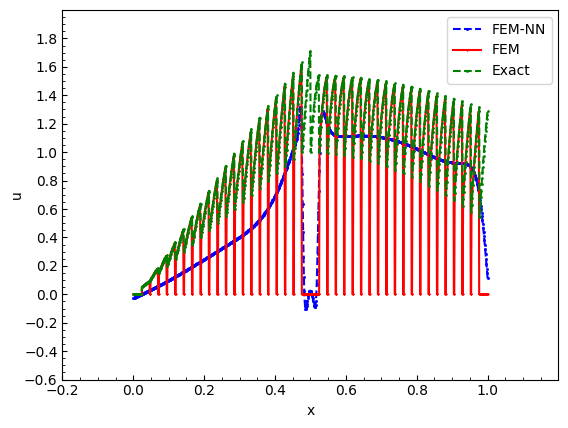

plotting Caarc finished!


In [14]:
plot_data(var1, var2, var3,'test', ["FEM-NN", "FEM", "Exact", "x", "u"])